# KNN

# Q1-Glass
Prepare a model for glass classification using KNN

In [53]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [54]:
import warnings
warnings.simplefilter('ignore')

In [55]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [56]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


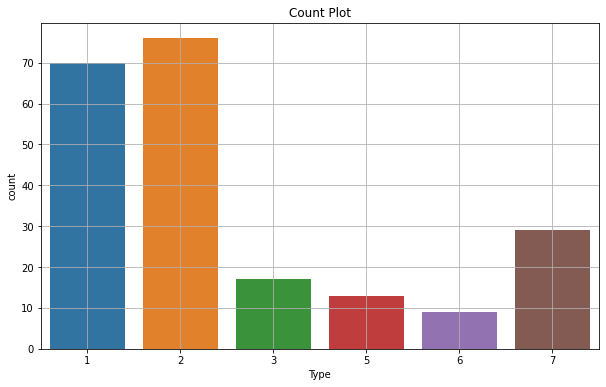

In [57]:
#count plot
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(df['Type'])
plt.grid(True)
plt.title('Count Plot')
plt.show()

In [58]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

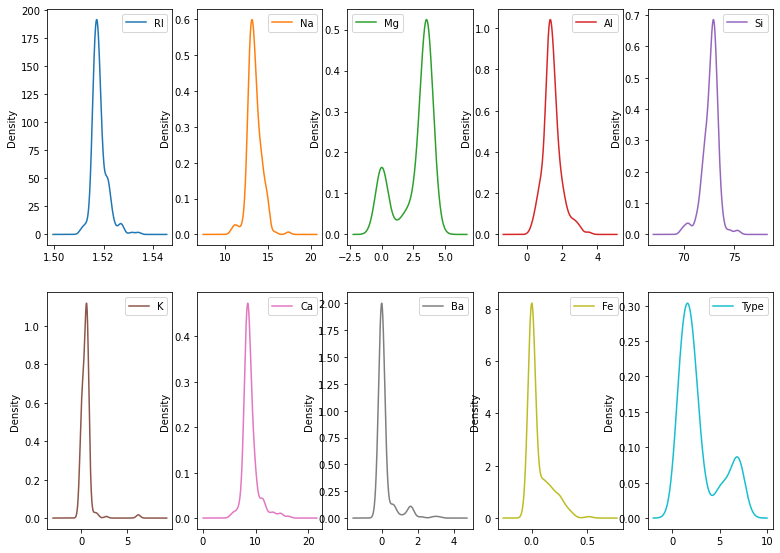

In [59]:
df.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

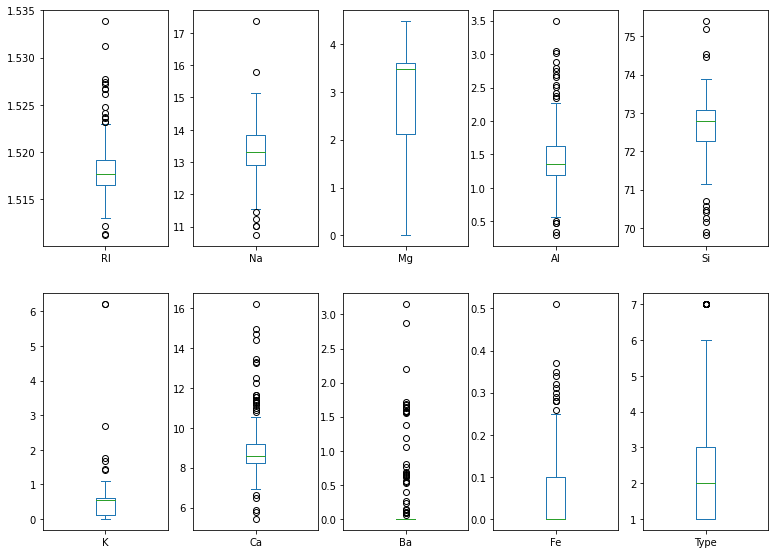

In [60]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

As seen in the above graph, there is a high correlation exists between some of the variables

# KNN

# Data Preparation

In [61]:
X= df.drop('Type',axis=1)
y=df[['Type']]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [63]:
X_train.shape,y_train.shape

((171, 9), (171, 1))

In [64]:
X_test.shape,y_test.shape

((43, 9), (43, 1))

# Model Building || Model Training

In [65]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

# Model Testing

In [66]:
#prediction for training
pred_y= knn.predict(X_train)

In [67]:
#accuracy Score
accuracy_score(y_train,pred_y)

1.0

In [68]:
#counfusion Matrix
confusion_matrix(y_train,pred_y)

array([[53,  0,  0,  0,  0,  0],
       [ 0, 63,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0, 25]], dtype=int64)

In [69]:
print(classification_report(y_train,pred_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        25

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



For Test Data

In [70]:
#prediction for testing data
y_pred=knn.predict(X_test)

In [71]:
#accuracy score for test data
accuracy_score(y_test,y_pred)

0.5348837209302325

In [72]:
#confusion Matrix
confusion_matrix(y_test,y_pred)

array([[6, 6, 5, 0, 0, 0],
       [1, 9, 0, 1, 2, 0],
       [2, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 3]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.67      0.35      0.46        17
           2       0.56      0.69      0.62        13
           3       0.25      0.50      0.33         4
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         2
           7       0.75      0.75      0.75         4

    accuracy                           0.53        43
   macro avg       0.50      0.55      0.50        43
weighted avg       0.58      0.53      0.53        43



# Visualizing the CV results

In [74]:
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())

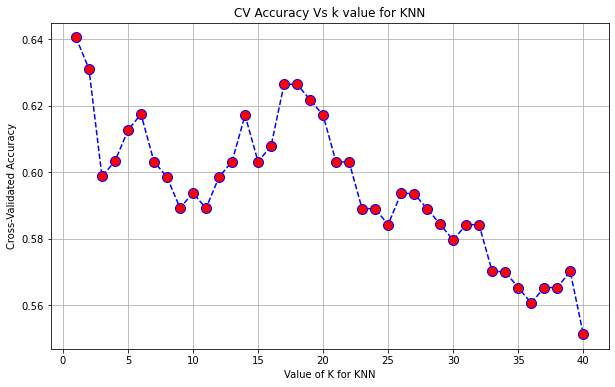

In [75]:
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.grid(True)
plt.title('CV Accuracy Vs k value for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()